Import Necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Summary Statistics & Missing-Value Report

In [2]:
df = pd.read_csv("../data/togo-dapaong_qc.csv")
print("Description of all numeric values : ")
df.describe()

Description of all numeric values : 


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,230.555040,151.258469,116.444352,226.144375,219.568588,27.751788,55.013160,2.368093,3.229490,0.557740,161.741845,10.559568,975.915242,0.000535,0.001382,32.444403,33.543330,NaN
std,322.532347,250.956962,156.520714,317.346938,307.932510,4.758023,28.778732,1.462668,1.882565,0.268923,91.877217,5.915490,2.153977,0.023116,0.026350,10.998334,12.769277,NaN
min,-12.700000,0.000000,0.000000,0.000000,0.000000,14.900000,3.300000,0.000000,0.000000,0.000000,0.000000,0.000000,968.000000,0.000000,0.000000,13.100000,13.100000,NaN
25%,-2.200000,0.000000,0.000000,0.000000,0.000000,24.200000,26.500000,1.400000,1.900000,0.400000,74.800000,6.900000,975.000000,0.000000,0.000000,23.900000,23.600000,NaN
50%,2.100000,0.000000,2.500000,4.400000,4.300000,27.200000,59.300000,2.200000,2.900000,0.500000,199.100000,10.800000,976.000000,0.000000,0.000000,28.400000,28.400000,NaN
75%,442.400000,246.400000,215.700000,422.525000,411.000000,31.100000,80.800000,3.200000,4.400000,0.700000,233.500000,14.100000,977.000000,0.000000,0.000000,40.600000,43.000000,NaN
max,1424.000000,1004.500000,805.700000,1380.000000,1367.000000,41.400000,99.800000,16.100000,23.100000,4.700000,360.000000,86.900000,983.000000,1.000000,2.300000,70.400000,94.600000,NaN


In [3]:
df.head(5)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
print("Check for missing values : ")
df.isna().sum()

Check for missing values : 


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [5]:
print("List of columns with >5% nulls : ")
null_percent = df.isna().mean() * 100  #calculating null values percentage
null_percent[null_percent > 5]         #extracting those with percentages greater than 5

List of columns with >5% nulls : 


Comments    100.0
dtype: float64

Outlier Detection & Basic Cleaning

In [6]:
key_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
    
# Calculating z-scores of key_cols with additional column names appending '_z'
for c in key_cols:
    df[c + '_z'] = stats.zscore(df[c], nan_policy='omit')

# Flag rows with |Z| > 3
outliers = df[(df[[c + '_z' for c in key_cols]].abs() > 3).any(axis=1)]
outliers.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModA,TModB,Comments,GHI_z,DNI_z,DHI_z,ModA_z,ModB_z,WS_z,WSgust_z
4985,2021-10-28 11:06,1139.0,805.1,466.1,1172.0,1154.0,29.8,70.8,2.2,2.6,...,44.7,50.2,NaN,2.816604,2.605396,2.233928,2.980513,3.034536,-0.114923,-0.334379
5410,2021-10-28 18:11,-1.2,0.0,0.0,0.0,0.0,29.7,63.5,6.6,9.7,...,30.0,29.5,NaN,-0.718549,-0.602727,-0.743956,-0.712610,-0.713042,2.893282,3.437076
5411,2021-10-28 18:12,-1.0,0.0,0.0,0.0,0.0,29.3,62.4,6.9,8.9,...,29.9,29.5,NaN,-0.717929,-0.602727,-0.743956,-0.712610,-0.713042,3.098387,3.012123
5413,2021-10-28 18:14,-0.8,0.0,0.0,0.0,0.0,28.6,63.7,7.1,8.9,...,29.5,29.2,NaN,-0.717309,-0.602727,-0.743956,-0.712610,-0.713042,3.235124,3.012123
5420,2021-10-28 18:21,-1.3,0.0,0.0,0.0,0.0,27.7,64.5,6.1,8.9,...,28.4,28.2,NaN,-0.718859,-0.602727,-0.743956,-0.712610,-0.713042,2.551441,3.012123


In [7]:
# There are no missing values on those key_cols
df[key_cols] = df[key_cols].apply(lambda x: x.fillna(x.median()))
df.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,TModA,TModB,Comments,GHI_z,DNI_z,DHI_z,ModA_z,ModB_z,WS_z,WSgust_z
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,...,24.7,24.4,NaN,-0.718859,-0.602727,-0.743956,-0.71261,-0.713042,-1.003710,-1.131165
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,...,24.7,24.4,NaN,-0.718859,-0.602727,-0.743956,-0.71261,-0.713042,-0.866974,-0.865570
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,...,24.7,24.4,NaN,-0.718859,-0.602727,-0.743956,-0.71261,-0.713042,-0.798606,-0.971808
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,...,24.7,24.4,NaN,-0.718549,-0.602727,-0.743956,-0.71261,-0.713042,-0.798606,-0.865570
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,...,24.7,24.4,NaN,-0.718549,-0.602727,-0.743956,-0.71261,-0.713042,-0.730237,-0.865570


In [9]:
df.to_csv('../data/togo-dapaong_qc_clean.csv', index=False)


Time Series Analysis

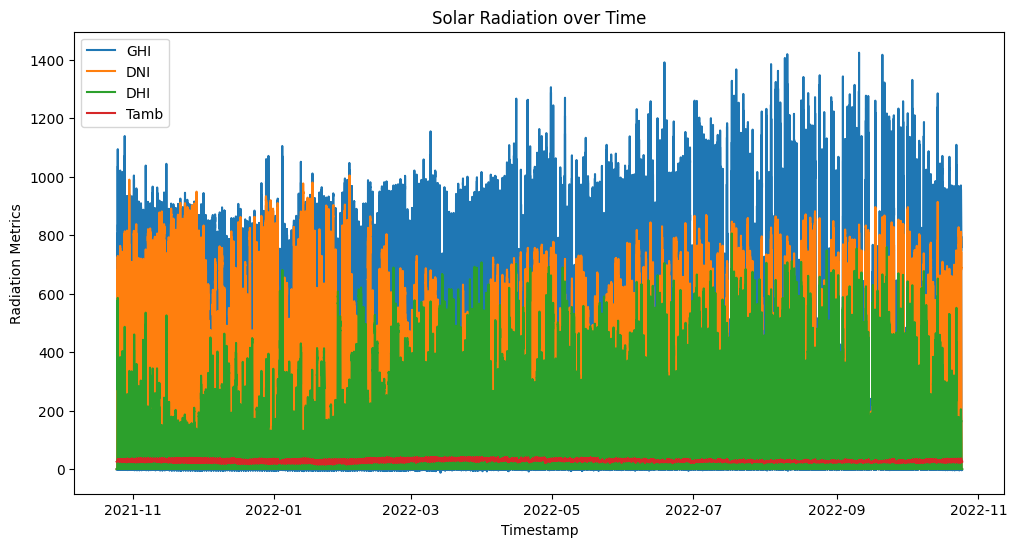

In [10]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.sort_values('Timestamp')

# Line plots of key metrics
plt.figure(figsize=(12, 6))
plt.plot(df['Timestamp'], df['GHI'], label='GHI')
plt.plot(df['Timestamp'], df['DNI'], label='DNI')
plt.plot(df['Timestamp'], df['DHI'], label='DHI')
plt.plot(df['Timestamp'], df['Tamb'], label='Tamb')
plt.legend()
plt.title('Solar Radiation over Time')
plt.xlabel('Timestamp')
plt.ylabel('Radiation Metrics')
plt.show()


Cleaning Impact

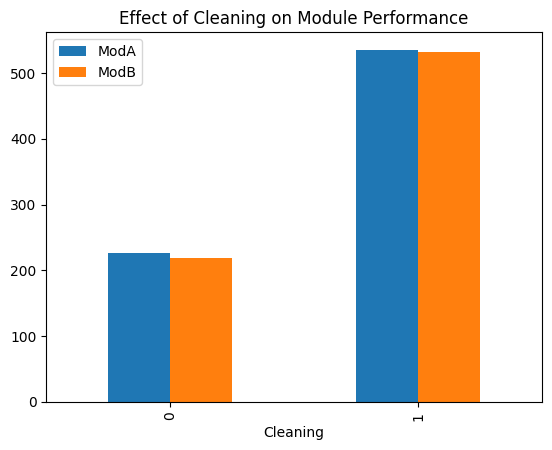

In [11]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title('Effect of Cleaning on Module Performance')
plt.show()


Correlation & Relationship Analysis

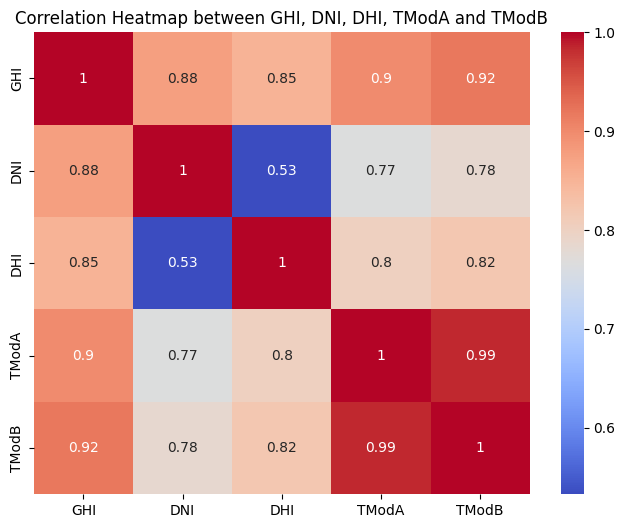

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between GHI, DNI, DHI, TModA and TModB')
plt.show()


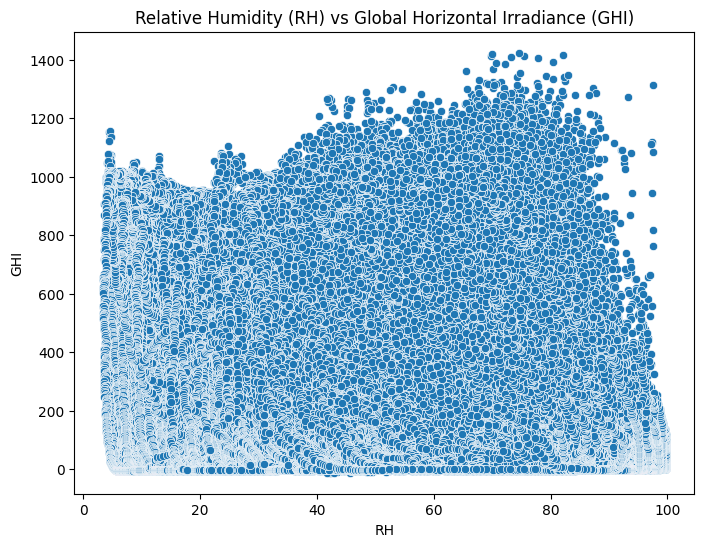

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title('Relative Humidity (RH) vs Global Horizontal Irradiance (GHI)')
plt.show()


Wind & Distribution Analysis


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


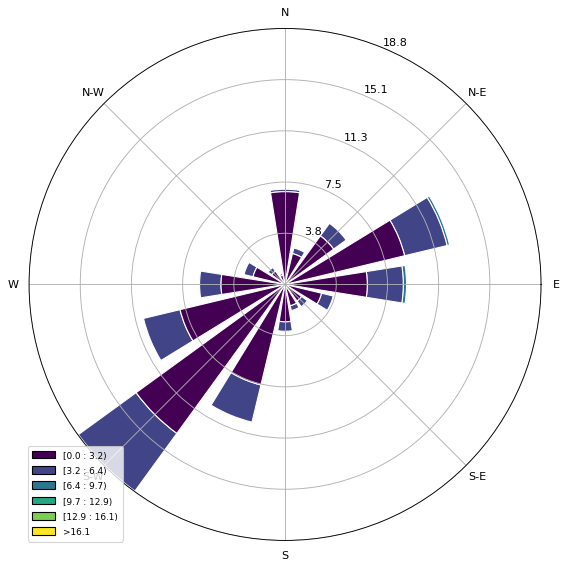

In [15]:
!pip install windrose
from windrose import WindroseAxes

ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()


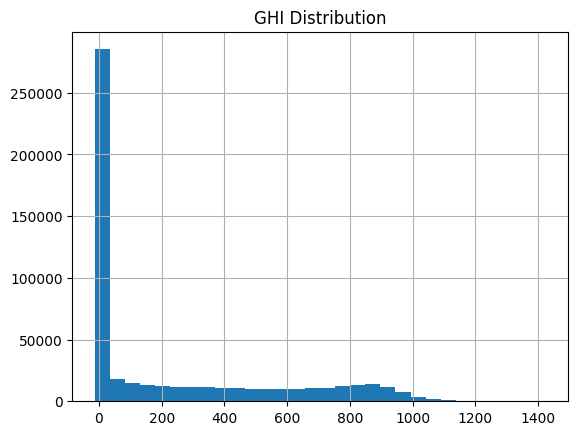

In [16]:
df['GHI'].hist(bins=30)
plt.title('GHI Distribution')
plt.show()


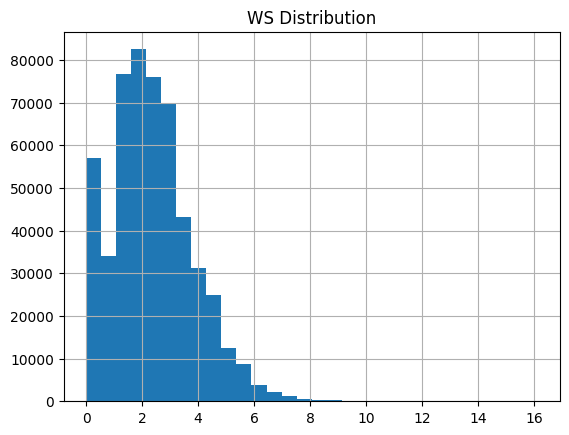

In [17]:
df['WS'].hist(bins=30)
plt.title('WS Distribution')
plt.show()


Temperature Analysis

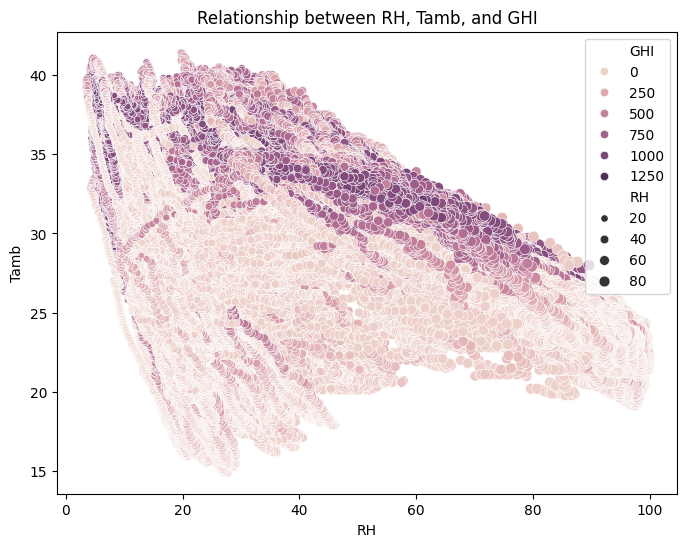

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='RH', y='Tamb', hue='GHI', size='RH', data=df)
plt.title('Relationship between RH, Tamb, and GHI')
plt.show()


Bubble Chart

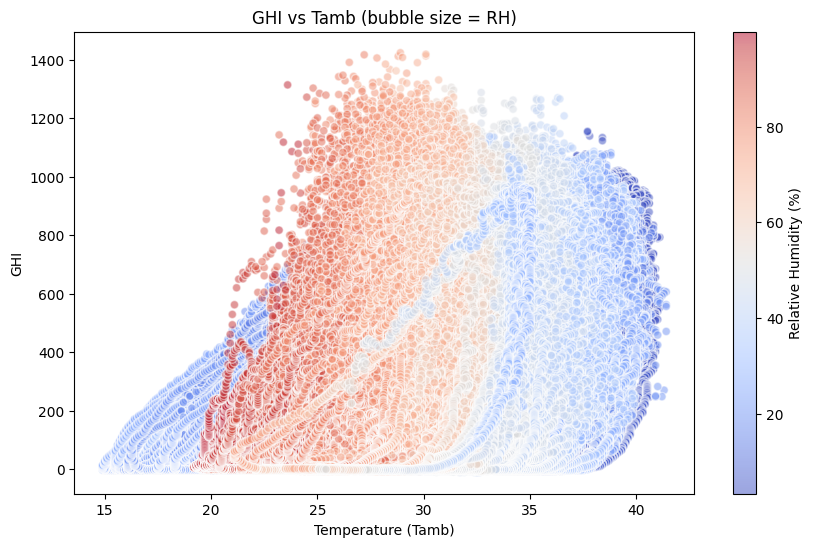

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(df['Tamb'], df['GHI'], c=df['RH'], alpha=0.5,  cmap='coolwarm', edgecolors='w')
plt.xlabel('Temperature (Tamb)')
plt.ylabel('GHI')
plt.title('GHI vs Tamb (bubble size = RH)')
plt.colorbar(label='Relative Humidity (%)')
plt.show()
